In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib


from astropy.io import fits
import os


from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
from gPhoton.gphoton_utils import read_lc
import datetime

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
file = 'III_159A_catalog.dat'
names = ('Star', 'Nobs', 'Smin', 'Smax', 'Smean', 'e_Smean', 'sdS', 'Wmin', 'Wmean', 
         'Date1', 'Date2', 'SName', 'RAdeg DEdeg', 's', 'Bmag', 'Vmag', 'ASCC', 'HIP')
hk = pd.read_table(file, delimiter='|', comment='#', names=names)

radec = hk['RAdeg DEdeg'].str.split(' ', expand=True).loc[:,0:1]
radec.columns = ['RA', 'Dec']
# print(radec)

In [16]:
# i = 281 # the star w/ 77 visits in GALEX (HD 4174, symbiotic M giant)

i = 261 # 74 visits (HD 3765)



In [3]:
# target = hk['Star'][i]
# ra = float(radec['RA'][i][1:])
# print(ra)
# dec = float(radec['Dec'][i][1:])
# print(dec)

# coordinates found for HD 4174
# 11.1549167,  40.6793889 from isrc.


# coordinates that I found
# ra = 10.2920
# dec = 40.2025


# found using isrc data, extremely close to what I found
# ra = 10.20528789
# dec = 40.18717517

# new coordinates with procession calculated
# ra = 10.25784158
# dec = 40.20826933

target = "GJ 3685 a"
ra = 176.92
dec = 0.254

step_size = 10. # the time resolution
img_step_size = 30.
img_size = [0.1, 0.1]
phot_rad = 0.0045
# phot_rad = 0.01
ap_in = 0.0060 #changed from .005
ap_out = 0.0070 #changed from .006
# ap_in = 0.015
# ap_out = 0.02



# img_step_size = 30.
#screen saver

print(target)

GJ 3685 a


In [4]:
exp_data = gFind(band="NUV", skypos=[ra, dec], exponly=True)
k = 0;
timeArray = []
for tstart, tstop in zip(exp_data['NUV']['t0'], exp_data['NUV']['t1']):
        
        timeArray.append((tstart, tstop))
#         print(tstart, tstop, tstop-tstart)
        print(timeArray[k][0],timeArray[k][1],timeArray[k][1]-timeArray[k][0])
        k = k + 1
#         print(len(timeArray))
#         if k == 5:
#             break
        
            

NUV: 3516.0s (raw) in 6 exposures.
762275988.995 762276104.995 116.0
765579107.995 765579821.995 714.0
765585336.995 765585739.995 403.0
766525332.995 766526576.995 1244.0
858613178.995 858613287.995 109.0
919754986.995 919755916.995 930.0


In [5]:
(exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.)

array([ 0.        ,  0.10474122,  0.10493874,  0.13474581,  3.05483226,
        4.99362627])

In [6]:
step_size = 100 # seconds

flux = np.zeros(len(exp_data['NUV']['t0']))

aVar = True
counter = 0

currentTime = str(datetime.datetime.now())
currentTime = currentTime.split(" ")
currentTime = currentTime[1].split(":")
currentTime = str(currentTime[0])+":"+str(currentTime[1])

currentDate = str(datetime.date.today()) + "_" + str(counter)
while(aVar):
    if not os.path.exists(currentDate):
        os.makedirs(currentDate)
        os.makedirs(currentDate + "/ds9_Images")
        os.makedirs(currentDate + "/data")
        aVar = False
    else:
        counter = counter + 1 
        currentDate = str(datetime.date.today()) + "_" + str(counter)
        avar = True

print(datetime.datetime.now())
for k in range(len(exp_data['NUV']['t0'])):
    photon_events = gAperture(band='NUV', skypos=[ra, dec], stepsz=step_size, radius= phot_rad,
                              annulus=[ap_in, ap_out], verbose=3, csvfile=currentDate+"/data/"+target+ '_' +str(k)+"_lc.csv",
                              trange=[int(exp_data['NUV']['t0'][k]), int(exp_data['NUV']['t1'][k])+1], 
                              overwrite=True)
    data = read_lc(currentDate+'/data/'+target+ '_' +str(k)+"_lc.csv")
    flux[k] = np.median(data['flux_bgsub'])
    print(datetime.datetime.now(), k)
    
    
    


2017-05-17 15:51:22.970293
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [176.92, 0.254]
 tranges: [762275988, 762276105]
 radius:  0.0045
 annulus: [0.006, 0.007]
 stepsz:  100
 csvfile: 2017-05-17_0/data/GJ 3685 a_0_lc.csv
 verbose: 3
2017-05-17 15:51:37.170690 0                                                                                            
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [176.92, 0.254]
 tranges: [765579107, 765579822]
 radius:  0.0045
 annulus: [0.006, 0.007]
 stepsz:  100
 csvfile: 2017-05-17_0/data/GJ 3685 a_1_lc.csv
 verbose: 3
2017-05-17 15:52:05.733749 1                                                                                            
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [176.92, 0.254]
 tranges: [765585336, 765585740]
 radius:  0.0045
 annulus: [0.006

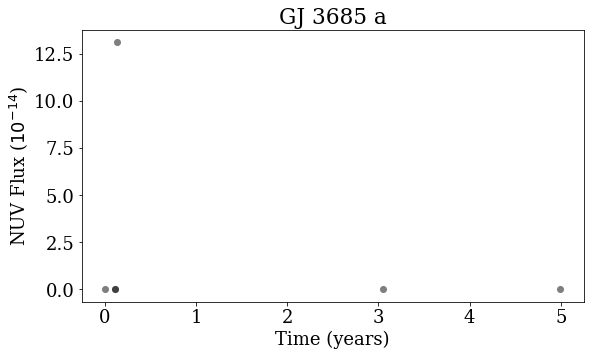

In [7]:
plt.figure(figsize=(9,5))
plt.scatter((exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) , flux/1e-14,
           s=50, alpha=0.5, lw=0, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('NUV Flux ($10^{-14}$)')
plt.title(target)

plt.savefig(currentDate+'/'+target+'_.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
plt.savefig("Plots/"+currentDate+"_"+currentTime+"_"+target+'_.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

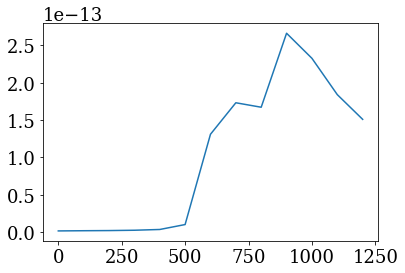

In [17]:
# for k in range(len(exp_data['NUV']['t0'])):
k = 3

data = read_lc(currentDate+'/data/'+target+ '_' +str(k)+"_lc.csv")
#     flux[k] = np.median(data['flux_bgsub'])
plt.plot(data['t0_data'] - data['t0_data'][0], data['flux_bgsub'])

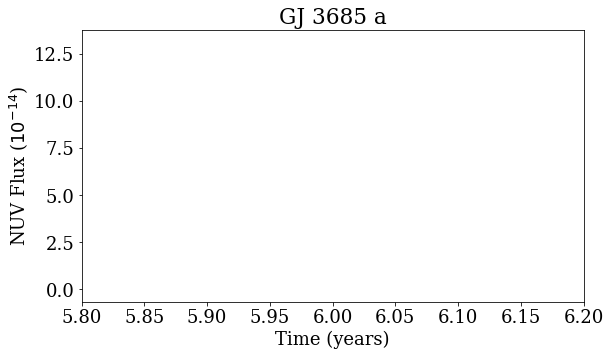

In [8]:
#let's explore just around year 6, big scatter
plt.figure(figsize=(9,5))
plt.scatter((exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60.*60.*24.*365.), flux/1e-14,
           s=50, alpha=0.5, lw=0, color='k')
plt.xlabel('Time (years)')
plt.ylabel('NUV Flux ($10^{-14}$)')
plt.xlim(5.8,6.2)
plt.title(target)

# plt.savefig(target+'.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [23]:
exp_data['NUV']['t0'][0]

749646829.995

In [11]:
# lets see if the mean flux for each visit is available? (doubt it...)
# would eliminate need for gAperature step for quick-look evolution!
# exp_data2 = gFind(band="both", skypos=[ra, dec])

In [12]:
# exp_data2
# NOPE....

In [9]:

for k in range(0,len(timeArray)):  
    w = str(k)
    gMap(band= "NUV", skypos=[ra, dec], stepsz=100 , skyrange=[0.010, 0.010],
             cntfile= currentDate+"/ds9_Images/"+target+"_visitNumber_"+w+".fits",
             trange=[timeArray[k][0], timeArray[k][1]])
#   values I found 10.2920hours, 40.2025degrees
#   test with 10.20528789,  40.18717517
#   old skypos=[10.3042, 40.1888]
#   gMap uses degrees for image size
#     if (k ==3):
#         break



In [ ]:
gMap(band='NUV', skypos=[10.3042, 40.1888], skyrange=[0.033, 0.033], cntfile="helix_fuv.fits" )


In [ ]:
exp_data['NUV']

In [8]:

gMap(band= "NUV", skypos=[10.3042, 40.1888], stepsz=100 , skyrange=[0.05, 0.05],
             cntfile= "gj_3765test93_count_movie.fits", trange=[749646829, 749647398])